E

# Importing the libraries

In [214]:
# reading in data
import re
import string
import numpy as np 
import random
import pandas as pd 
!pip install wordcloud 


#Vissualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go # pip install plotly==4.8.1
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #pip install wordcloud

#Preprocessing
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
nltk.download('averaged_perceptron_tagger')
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

#modeling
from sklearn.feature_extraction.text import CountVectorizer

#csv paths
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\27833\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Below is a helper Function which generates random colors which will be used to give different colors to our plots.

In [215]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# Getting Data

In [216]:
# Load dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ss_df = pd.read_csv('sample_submission.csv')

In [217]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [218]:
print('___basic info of the train data___')
print(train_df.info())
print('Dataset size:', train_df.shape)
print('Columns are:',train_df.columns)

print('___Print the head/Tain of the train data_____')
print(train_df.head())
print('________________________')
print(train_df.tail())

___basic info of the train data___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
Dataset size: (15819, 3)
Columns are: Index(['sentiment', 'message', 'tweetid'], dtype='object')
___Print the head/Tain of the train data_____
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
________________________

As seen above, when we print some basic information about the data. We can notice right away how each row is represented either by int64 or Object (for TextData). Finally after plotting the histogram of the sentiment data, its clear that there more positive examples then negative examples. (1 being denoted as positive sentiment while 0 being denoted as negative.). There are four sentiments in total.

# Data cleaning and Preprocessing

## Removing the noise

Replacing contaction phrases 

In [219]:
contractions_dict = contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
    return text

train_df['fixed_cntractions'] = train_df['message'].apply(lambda x: expand_contractions(x))
test_df['fixed_cntractions'] = test_df['message'].apply(lambda x: expand_contractions(x))

### Dealig with the punctuations and the links present in the messages

In [220]:
def remov_pnct(text):
    '''The Function makes text lowercase,removes links, punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.'''
    
    text = str(text).lower() #Make text lowercase
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())# remove @user, #word and link
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) ##remove punctuation
    text = re.sub('\n', '', text)
    text = ''.join([i for i in text[:] if not i.isdigit()]) #remove numbers
    return text

train_df['clean_message'] = train_df['fixed_cntractions'].apply(lambda x: remov_pnct(x))
test_df['clean_message'] = test_df['fixed_cntractions'].apply(lambda x: remov_pnct(x))

In [221]:
train_df.head()

,sentiment,message,tweetid,fixed_cntractions,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...


### Parts of Speech Tagging (POS)

In [222]:
import nltk
nltk.download('punkt')

train_df['message_POS'] = train_df['clean_message'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
test_df['message_POS'] = test_df['clean_message'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
train_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\27833\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (..."
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...,"[(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...,"[(rt, NN), (researchers, NNS), (say, VBP), (we..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...,"[(wired, VBN), (was, VBD), (a, DT), (pivotal, ..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...,"[(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (..."


### Lemmatisation


In [223]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [224]:
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import pandas as pd
nlp = spacy.load('en_core_web_sm')

In [225]:
train_df["lemmaa"] =train_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)
test_df["lemmaa"] =test_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)

In [226]:
train_df.head() 

,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (...",polyscimajor epa chief do not think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...,"[(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...",-PRON- have -PRON- be not like -PRON- lack evi...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...,"[(rt, NN), (researchers, NNS), (say, VBP), (we...",rt researcher say -PRON- have three year to ac...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...,"[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...",wired be a pivotal year in the war on climat...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...,"[(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...",rt -PRON- have -PRON- be and a racist sexist...


Removing the _PRON_ and rt   form column lemmaa 

In [227]:
def remove(text):
    '''removing the words -PRON- and rt'''
    text = re.sub(r'-PRON-','',text)
    text = re.sub(r'rt' , '' , text) 
    return text

In [228]:
train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))
train_df.head()

,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (...",polyscimajor epa chief do not think carbon dio...,polyscimajor epa chief do not think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...,"[(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...",-PRON- have -PRON- be not like -PRON- lack evi...,have be not like lack evidence of anthropog...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...,"[(rt, NN), (researchers, NNS), (say, VBP), (we...",rt researcher say -PRON- have three year to ac...,researcher say have three year to act on cli...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...,"[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...",wired be a pivotal year in the war on climat...,wired be a pivotal year in the war on climat...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...,"[(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...",rt -PRON- have -PRON- be and a racist sexist...,have be and a racist sexist climate chang...


## Tokenizing

In [229]:
def tokenization(text):
    '''split the message into taken of words'''
    text = word_tokenize(text)
    return text

In [230]:
from nltk.tokenize import word_tokenize
train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
train_df.head()

,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma,tokenized_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (...",polyscimajor epa chief do not think carbon dio...,polyscimajor epa chief do not think carbon dio...,"[polyscimajor, epa, chief, do, not, think, car..."
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...,"[(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...",-PRON- have -PRON- be not like -PRON- lack evi...,have be not like lack evidence of anthropog...,"[have, be, not, like, lack, evidence, of, anth..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...,"[(rt, NN), (researchers, NNS), (say, VBP), (we...",rt researcher say -PRON- have three year to ac...,researcher say have three year to act on cli...,"[researcher, say, have, three, year, to, act, ..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...,"[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...",wired be a pivotal year in the war on climat...,wired be a pivotal year in the war on climat...,"[wired, be, a, pivotal, year, in, the, war, on..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...,"[(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...",rt -PRON- have -PRON- be and a racist sexist...,have be and a racist sexist climate chang...,"[have, be, and, a, racist, sexist, climate, ch..."


### Stop Words

In [231]:
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#print(sorted(stopwords.words('english')))


In [232]:
stop = ['a', 'about', 'above','after', 'again', 'against', 
        'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 
        'as', 'at', 'be', 'because', 'been', 'before', 'being', 
        'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 
        "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', 
        "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 
        'for', 'from', 'further', 'had', 'hadn', 
        "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 
        'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 
        'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 
        'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 
        'my', 'myself', 'needn', "needn't", 'no', 'nor','now', 'o', 'of', 'off', 
        'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 
        're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', 
        "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 
        'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
        'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 
        'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 
        'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', 
        "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [233]:
'of' in stop# is removed from the stop words

True

In [234]:
train_df['clean_stp_words'] = train_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
test_df['clean_stp_words'] = test_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
test_df.head()

,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma,tokenized_message,clean_stp_words
0,Europe will now be looking to China to make su...,169760,Europe will now be looking to China to make su...,europe will now be looking to china to make su...,"[(europe, NN), (will, MD), (now, RB), (be, VB)...",europe will now be look to china to make sure ...,europe will now be look to china to make sure ...,"[europe, will, now, be, look, to, china, to, m...","[europe, look, china, make, sure, not, alone, ..."
1,Combine this with the polling of staffers re c...,35326,Combine this with the polling of staffers re c...,combine this with the polling of staffers re c...,"[(combine, NN), (this, DT), (with, IN), (the, ...",combine this with the polling of staffer re cl...,combine this with the polling of staffer re cl...,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffer, climate, change, w..."
2,"The scary, unimpeachable evidence that climate...",224985,"The scary, unimpeachable evidence that climate...",the scary unimpeachable evidence that climate ...,"[(the, DT), (scary, JJ), (unimpeachable, JJ), ...",the scary unimpeachable evidence that climate ...,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,putin got to you too jill trump does not belie...,"[(putin, NN), (got, VBD), (to, TO), (you, PRP)...",putin get to -PRON- too jill trump do not beli...,putin get to too jill trump do not believe in...,"[putin, get, to, too, jill, trump, do, not, be...","[putin, get, jill, trump, not, believe, climat..."
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,RT @FakeWillMoore: 'Female orgasms cause globa...,rt female orgasms cause global warming sarcast...,"[(rt, JJ), (female, JJ), (orgasms, NN), (cause...",rt female orgasm cause global warm sarcastic r...,female orgasm cause global warm sarcastic rep...,"[female, orgasm, cause, global, warm, sarcasti...","[female, orgasm, cause, global, warm, sarcasti..."


# Creating features

Getting the number of clean words and comparing them with that  raw from the message and clean message columns.

In [235]:
#train data frame
train_df['Num_words_raw'] = train_df['message'].apply(lambda x:len(str(x).split())) 
train_df['Num_words_clean'] = train_df['clean_stp_words'].apply(lambda x:len(str(x).split()))
#Difference in Number of words text and Selected Text
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] - train_df['Num_words_clean']) 
#test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda x:len(str(x).split())) 
test_df['Num_words_clean'] = test_df['clean_stp_words'].apply(lambda x:len(str(x).split())) 
#Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw'] - test_df['Num_words_clean'])

In [236]:
test_df.head()  

,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma,tokenized_message,clean_stp_words,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,Europe will now be looking to China to make su...,169760,Europe will now be looking to China to make su...,europe will now be looking to china to make su...,"[(europe, NN), (will, MD), (now, RB), (be, VB)...",europe will now be look to china to make sure ...,europe will now be look to china to make sure ...,"[europe, will, now, be, look, to, china, to, m...","[europe, look, china, make, sure, not, alone, ...",20,10,10
1,Combine this with the polling of staffers re c...,35326,Combine this with the polling of staffers re c...,combine this with the polling of staffers re c...,"[(combine, NN), (this, DT), (with, IN), (the, ...",combine this with the polling of staffer re cl...,combine this with the polling of staffer re cl...,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffer, climate, change, w...",20,9,11
2,"The scary, unimpeachable evidence that climate...",224985,"The scary, unimpeachable evidence that climate...",the scary unimpeachable evidence that climate ...,"[(the, DT), (scary, JJ), (unimpeachable, JJ), ...",the scary unimpeachable evidence that climate ...,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...",14,6,8
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,putin got to you too jill trump does not belie...,"[(putin, NN), (got, VBD), (to, TO), (you, PRP)...",putin get to -PRON- too jill trump do not beli...,putin get to too jill trump do not believe in...,"[putin, get, to, too, jill, trump, do, not, be...","[putin, get, jill, trump, not, believe, climat...",23,10,13
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,RT @FakeWillMoore: 'Female orgasms cause globa...,rt female orgasms cause global warming sarcast...,"[(rt, JJ), (female, JJ), (orgasms, NN), (cause...",rt female orgasm cause global warm sarcastic r...,female orgasm cause global warm sarcastic rep...,"[female, orgasm, cause, global, warm, sarcasti...","[female, orgasm, cause, global, warm, sarcasti...",9,7,2


# Exploratory Data Analysis

Taking a closer look at the distribution of tweeter messages in the train set.

In [237]:
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


In [238]:
fig = px.funnel(temp, x='sentiment', y='message', color='sentiment')
fig.show()

### Wordcloud Visualization

(-0.5, 399.5, 199.5, -0.5)

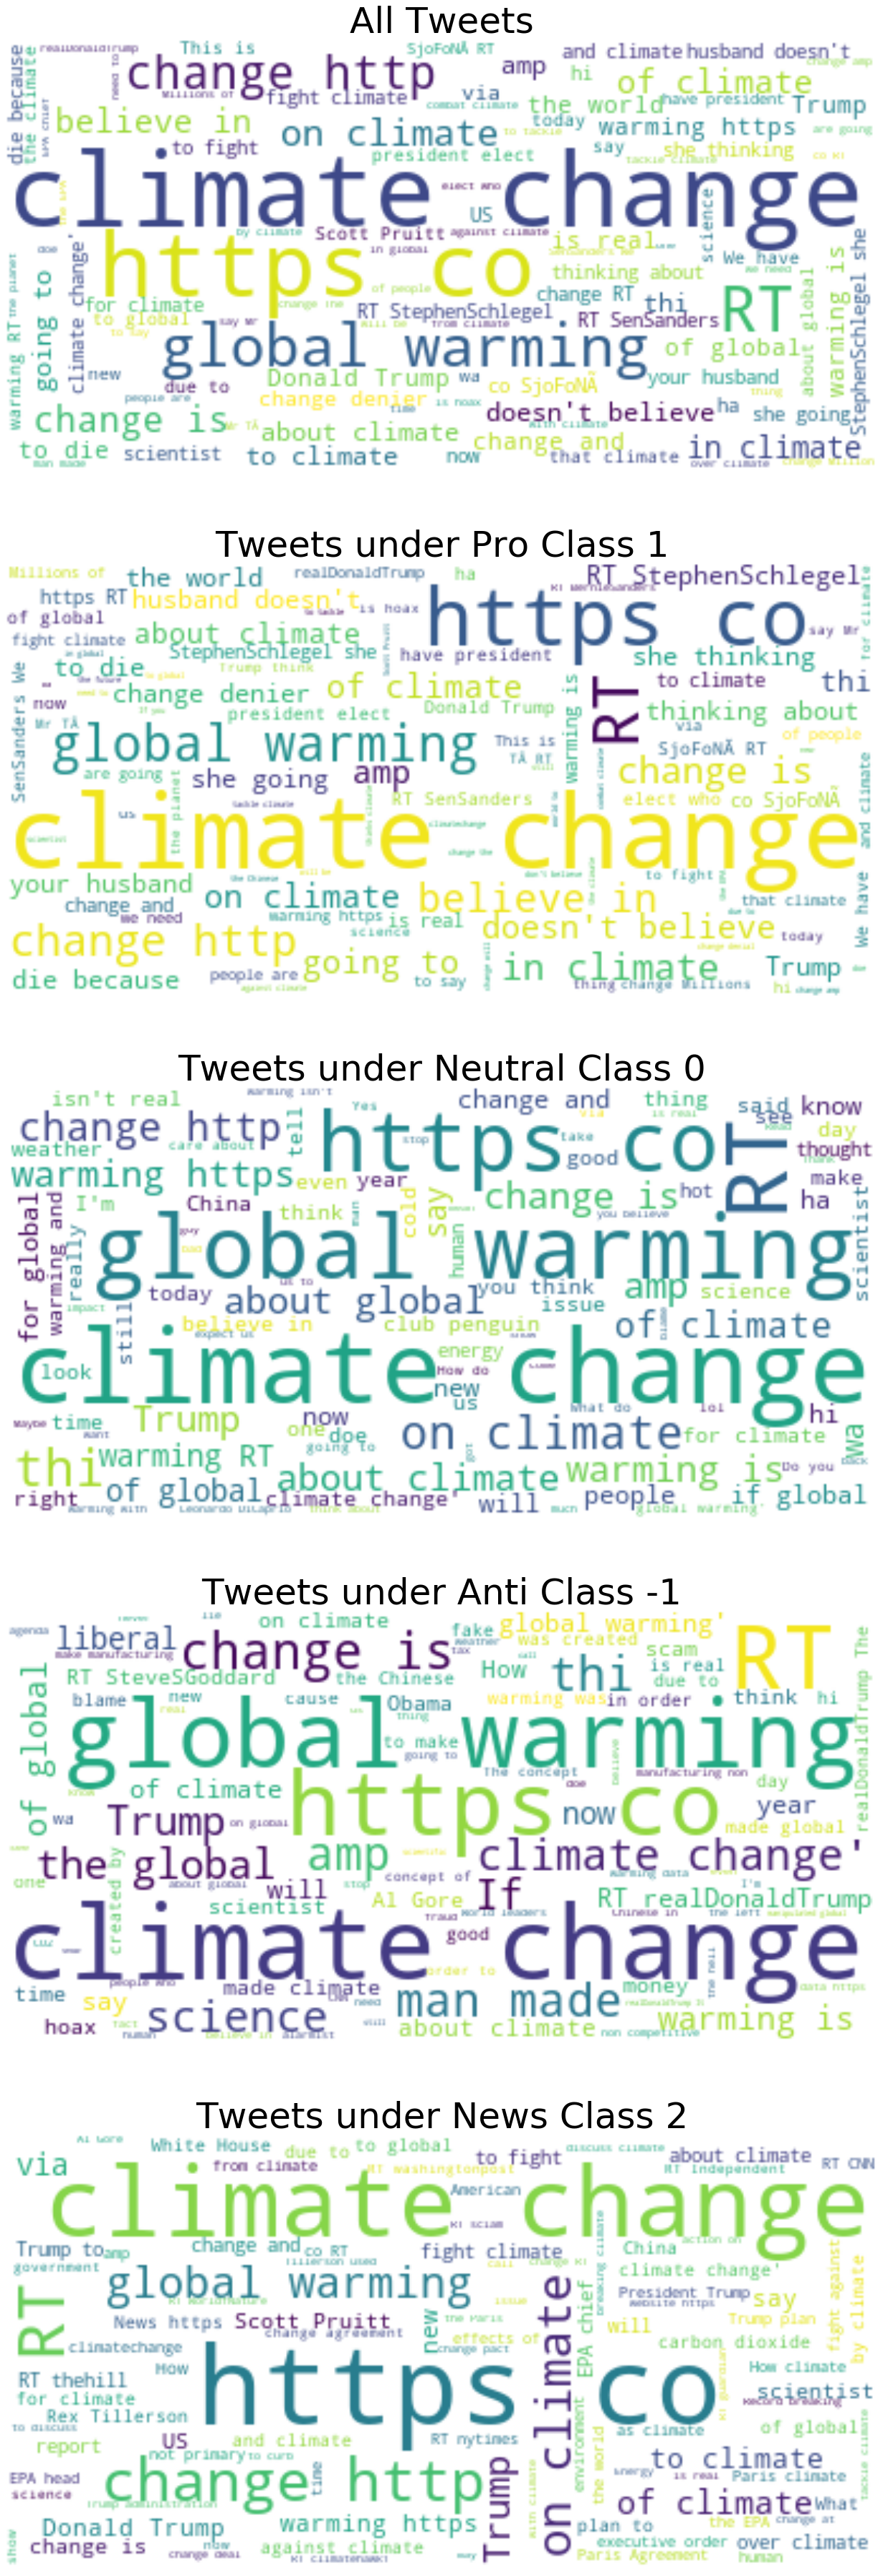

In [239]:
#pd.set_option('display.max_colwidth', 60)
# visualising the messages 
df_senti1 = train_df[train_df['sentiment']==1]
df_senti0 = train_df[train_df['sentiment']==0]
df_senti_neg1 = train_df[train_df['sentiment']==-1]
df_senti2 = train_df[train_df['sentiment']==2]
tweet_All = " ".join(review for review in train_df.message)
tweet_senti1 = " ".join(review for review in df_senti1.message)
tweet_senti0 = " ".join(review for review in df_senti0.message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.message)
tweet_senti2 = " ".join(review for review in df_senti2.message)

fig, ax = plt.subplots(5, 1, figsize  = (65,65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti1)
wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti0)
wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti_neg1)
wordcloud_2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Tweets under Pro Class 1',fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Tweets under Neutral Class 0',fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Tweets under Anti Class -1',fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('Tweets under News Class 2',fontsize=50)
ax[4].axis('off')

In [240]:
def jaccard(str1, str2): 
    '''It takes two strings can be two columns fro a df and returns intersection of twe two  divided by thier union'''
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [241]:
# on the train_df
results_jaccard=[]

for ind,row in train_df.iterrows():
    sentence1 = row.message
    sentence2 = row.clean_message

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [242]:
jaccard = pd.DataFrame(results_jaccard,columns=["message","clean_message","jaccard_score"])
train_df = train_df.merge(jaccard,how='outer')

In [243]:
train_df.head()

,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma,tokenized_message,clean_stp_words,Num_words_raw,Num_words_clean,difference_in_wordsNo,jaccard_score
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (...",polyscimajor epa chief do not think carbon dio...,polyscimajor epa chief do not think carbon dio...,"[polyscimajor, epa, chief, do, not, think, car...","[polyscimajor, epa, chief, not, think, carbon,...",19,13,6,0.541667
1,1,It's not like we lack evidence of anthropogeni...,126103,it has / it is not like we lack evidence of an...,it has it is not like we lack evidence of anth...,"[(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...",-PRON- have -PRON- be not like -PRON- lack evi...,have be not like lack evidence of anthropog...,"[have, be, not, like, lack, evidence, of, anth...","[not, like, lack, evidence, anthropogenic, glo...",10,7,3,0.692308
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act ...,"[(rt, NN), (researchers, NNS), (say, VBP), (we...",rt researcher say -PRON- have three year to ac...,researcher say have three year to act on cli...,"[researcher, say, have, three, year, to, act, ...","[researcher, say, three, year, act, climate, c...",19,8,11,0.714286
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,wired was a pivotal year in the war on climat...,"[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...",wired be a pivotal year in the war on climat...,wired be a pivotal year in the war on climat...,"[wired, be, a, pivotal, year, in, the, war, on...","[wired, pivotal, year, war, climate, change]",15,6,9,0.733333
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: it has / it is 2016, and ...",rt it has it is and a racist sexist climate c...,"[(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...",rt -PRON- have -PRON- be and a racist sexist...,have be and a racist sexist climate chang...,"[have, be, and, a, racist, sexist, climate, ch...","[racist, sexist, climate, change, deny, bigot,...",18,8,10,0.478261


Diribution of number of words.

hist_data = [train_df['Num_words_raw'], train_df['Num_words_clean']]

group_labels = ['message','clean_message']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue")
fig.show()

The number of words plot is really interesting ,the tweets messages having number of words greater than 18 are very less and thus the number of words distribution plot is a little bit skewed the right

plt.figure(figsize=(12,6))
p1=sns.kdeplot(train_df['Num_words_raw'], shade=True, color="r").set_title('Distribution of Number Of words')
p2=sns.kdeplot(train_df['Num_words_clean'], shade=True, color="b")

#### Checking the differnce in number of words and jaccard_scores across different Sentiments

In [244]:
#plt.figure(figsize=(12,6))
#p1=sns.kdeplot(train_df[train_df['sentiment']== 1]['difference_in_wordsNo'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
#p2=sns.kdeplot(train_df[train_df['sentiment']== -1]['difference_in_wordsNo'], shade=True, color="r")
#p3=sns.kdeplot(train_df[train_df['sentiment']== 0]['difference_in_wordsNo'], shade=True, color="g")
#p4=sns.kdeplot(train_df[train_df['sentiment']== 2]['difference_in_wordsNo'], shade=True, color="y")
#plt.legend(labels=[1, -1, 0, 2])

sentiment 1 has the highest difference in number of words where the difference is by 5 words.

### Most Common words in message 

### raw message

In [245]:
train_df['temp_list'] = train_df['message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,she's,188525
1,to,145332
2,RT,144168
3,climate,141168
4,in,120700
5,change,115149
6,believe,114354
7,going,111717
8,doesn't,111533
9,about,97640


In [246]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Raw message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Clean messages

In [247]:
train_df['temp_list0'] = train_df['clean_stp_words']
top = Counter([item for sublist in train_df['temp_list0'] for item in sublist])
temp0 = pd.DataFrame(top.most_common(20))
temp0.columns = ['Common_words','count']
temp0.style.background_gradient(cmap='Greens')

,Common_words,count
0,change,141937
1,climate,141788
2,not,115864
3,believe,114686
4,go,112155
5,think,102150
6,die,94503
7,husband,94261
8,president,18716
9,elect,18585


In [248]:
fig = px.bar(temp0, x="count", y="Common_words", title='Commmon Words in cleaned message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

with stop words removed, now the most common word is climate 

## Most common words sentiment wise in raw message

In [249]:
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']== -1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']== 2]

In [250]:
#MosT common positive words(Pro)
top = Counter([item for sublist in Pro['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,she's,188520
1,to,141232
2,RT,137813
3,climate,135305
4,in,118967
5,believe,114203
6,going,111586
7,doesn't,111447
8,change,110598
9,about,95966


In [251]:
#MosT common negative words(Anti)
top = Counter([item for sublist in Anti['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,the,1464
2,to,1167
3,of,1097
4,global,1081
5,warming,938
6,climate,805
7,The,753
8,by,733
9,is,718
10,in,712


In [252]:
#MosT common words in Neutral sentiment
top = Counter([item for sublist in Neutral['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,global,1906
2,climate,1542
3,to,1227
4,warming,1198
5,about,1107
6,change,989
7,a,944
8,on,895
9,the,893
10,do,879


In [253]:
#MosT common words in News sentiment
top = Counter([item for sublist in News['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,change,2939
2,RT,2575
3,to,1706
4,Trump,1032
5,the,918
6,on,859
7,of,837
8,a,635
9,global,527
10,in,525


Clean messages sentiment wise 

Visuals for nomber of clean message and raw with thier diffences and jaccard score.

### Random Forest Modelling

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [255]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenization(text):
    '''split the message into taken of words'''
    text = TreebankWordDetokenizer().detokenize(text)
    return text

In [358]:
train_df['clean_token'] = [' '.join(map(str, l)) for l in train_df['clean_stp_words']]
test_df['clean_token'] = [' '.join(map(str, l)) for l in test_df['clean_stp_words']]

In [257]:
# defing the x and y varible
X_rf= train_df['clean_token']
y_rf=train_df['sentiment']
X_testdf_rf = test_df['clean_token']

In [258]:
#splitting the X and y into train and test 
X_rf, X_rf_test, y_rf, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer





text_clf_RF = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

In [260]:
text_clf_RF.fit(X_rf, y_rf)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [261]:
predictions = text_clf_RF.predict(X_rf_test)

In [262]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_rf_test,predictions))

[[  234    35   157     8]
 [    3   377   289    24]
 [    4    44 27954   110]
 [    0    10   274   536]]


In [263]:
print(metrics.classification_report(y_rf_test,predictions))

              precision    recall  f1-score   support

          -1       0.97      0.54      0.69       434
           0       0.81      0.54      0.65       693
           1       0.97      0.99      0.98     28112
           2       0.79      0.65      0.72       820

    accuracy                           0.97     30059
   macro avg       0.89      0.68      0.76     30059
weighted avg       0.97      0.97      0.97     30059



In [264]:
predictions_test = text_clf_RF.predict(X_testdf_rf)

In [265]:
#converting the numpy arry of predicted varriable to pnada dataframe
pred = pd.DataFrame(data=predictions_test,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
pred.reset_index(inplace=True)


In [ ]:
pred.set_index('tweetid')

In [269]:
pred.to_csv('RandomForest_classifier_5')



### Upsampling data with tokenised

In [312]:
from sklearn.utils import resample
sentiment_neg1 = train_df[train_df['sentiment']==-1]
sentiment_0 = train_df[train_df['sentiment']== 0]
sentiment_2 = train_df[train_df['sentiment']== 2]
sentiment1 = train_df[train_df['sentiment'] ==1]

In [313]:
# Upsample minority
sentiment_neg1_upsampled = resample(sentiment_neg1,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(sentiment1), # match number in minority class
                          random_state=27) # reproducible results

sentiment_0_upsampled = resample(sentiment_0,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(sentiment1), # match number in minority class
                          random_state=27) # reproducible results
sentiment_2_upsampled = resample(sentiment_2,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(sentiment1), # match number in minority class
                          random_state=27) # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([sentiment_neg1_upsampled,sentiment_0_upsampled, sentiment_2_upsampled, sentiment1])

# Check new class counts
upsampled['sentiment'].value_counts()

-1    140556
 2    140556
 1    140556
 0    140556
Name: sentiment, dtype: int64

In [321]:
upsampled['clean_token'] = [' '.join(map(str, l)) for l in upsampled['clean_stp_words']]

In [345]:
upsampled.head(2)

,sentiment,message,tweetid,fixed_cntractions,clean_message,message_POS,lemmaa,clean_lemma,tokenized_message,clean_stp_words,Num_words_raw,Num_words_clean,difference_in_wordsNo,jaccard_score,temp_list,temp_list0,detokenized,clean_token
135153,-1,RT @JunkScience: How 'climate scientists' deci...,344687,RT @JunkScience: How 'climate scientists' deci...,rt how climate scientists decide to attribute ...,"[(rt, VB), (how, WRB), (climate, JJ), (scienti...",rt how climate scientist decide to attribute w...,how climate scientist decide to attribute wea...,"[how, climate, scientist, decide, to, attribut...","[climate, scientist, decide, attribute, weathe...",14,8,6,0.500000,"[RT, @JunkScience:, How, 'climate, scientists'...","[climate, scientist, decide, attribute, weathe...",climate scientist decide attribute weather eve...,climate scientist decide attribute weather eve...
131813,-1,Snow in April? Yeah global warming is real,896213,Snow in April? Yeah global warming is real,snow in april yeah global warming is real,"[(snow, NN), (in, IN), (april, JJ), (yeah, NN)...",snow in april yeah global warming be real,snow in april yeah global warming be real,"[snow, in, april, yeah, global, warming, be, r...","[snow, april, yeah, global, warming, real]",8,6,2,0.777778,"[Snow, in, April?, Yeah, global, warming, is, ...","[snow, april, yeah, global, warming, real]",snow april yeah global warming real,snow april yeah global warming real


In [346]:
# defing the x and y varible
X_rfs= upsampled['clean_token']
y_rfs=upsampled['sentiment']
X_testdf_rfs = test_df['clean_token']

In [347]:
# slpitting the X and y into train and test 
X_rfs, X_rfs_test, y_rfs, y_rfs_test = train_test_split(X_rfs, y_rfs, test_size=0.2, random_state=42)

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer





text_clf_RFS = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])




In [349]:
text_clf_RFS.fit(X_rfs, y_rfs)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [350]:
predictionss = text_clf_RFS.predict(X_rfs_test)

In [351]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_rfs_test,predictionss))

[[27900    64    24     0]
 [   44 28228     0    21]
 [   38   204 27455   307]
 [    0    14     0 28146]]


In [352]:
print(metrics.classification_report(y_rfs_test,predictionss))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     27988
           0       0.99      1.00      0.99     28293
           1       1.00      0.98      0.99     28004
           2       0.99      1.00      0.99     28160

    accuracy                           0.99    112445
   macro avg       0.99      0.99      0.99    112445
weighted avg       0.99      0.99      0.99    112445



In [353]:
predictionss_test = text_clf_RFS.predict(X_testdf_rfs)

In [354]:
#converting the numpy arry of predicted varriable to pnada dataframe
preds1 = pd.DataFrame(data=predictionss_test,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
preds1.reset_index(inplace=True)


In [355]:
pres12 = preds1.set_index('tweetid')

In [356]:
pres12

,sentiment
tweetid,
169760,2
35326,2
224985,1
476263,1
872928,0
...,...
895714,0
875167,1
78329,1


In [357]:
pres12.to_csv('RandomForest_classifier_upsample2')

### Random Forest Upsampled Observation

In [366]:
The Random Forest Classifier produced a nearly perfect f1 score, however on kaggle the score dropped dramatically from above 99%
to 65%. This reflects a problem of overfitting. Hyperparameter tuning could improve the predictive capacity of this classifier.

SyntaxError: invalid syntax (<ipython-input-366-49d0f605eb74>, line 1)

### Upsampling with Stop Words

In [359]:
# defing the x and y varible
X_rfss= upsampled['clean_message']
y_rfss=upsampled['sentiment']
X_testdf_rfss = test_df['clean_message']

In [360]:
# slpitting the X and y into train and test 
X_rfss, X_rfss_test, y_rfss, y_rfss_test = train_test_split(X_rfss, y_rfss, test_size=0.2, random_state=42)

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer





text_clf_RFSS = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])



In [365]:
text_clf_RFSS.fit(X_rfss, y_rfss)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [368]:
predictionss1 = text_clf_RFSS.predict(X_rfss_test)

In [369]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_rfss_test,predictionss1))

[[27954    10    24     0]
 [   33 28244     0    16]
 [   16   145 27550   293]
 [    0    14     0 28146]]


In [370]:
print(metrics.classification_report(y_rfss_test,predictionss1))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     27988
           0       0.99      1.00      1.00     28293
           1       1.00      0.98      0.99     28004
           2       0.99      1.00      0.99     28160

    accuracy                           1.00    112445
   macro avg       1.00      1.00      1.00    112445
weighted avg       1.00      1.00      1.00    112445



In [371]:
predictionss1_test = text_clf_RFSS.predict(X_testdf_rfss)

In [372]:
#converting the numpy arry of predicted varriable to pnada dataframe
predss1 = pd.DataFrame(data=predictionss1_test,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
predss1.reset_index(inplace=True)


In [373]:
pres23 = predss1.set_index('tweetid')

In [374]:
pres23

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,0
875167,1
78329,2


In [375]:
pres23.to_csv('RandomForest_classifier_upsample_no_stpword')

### Hyperparameter Tuning Random Forest

In [382]:
# import SMOTE module from imblearn library 
!pip install imblearn  
from imblearn.over_sampling import SMOTE 


In [402]:
# defing the x and y varible
X_sm= train_df['clean_token']
y_sm=train_df['sentiment']
X_testdf_sm = test_df['clean_token']

In [413]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0)

In [414]:
sm = SMOTE(random_state = 2)

In [415]:
X_train_res, y_train_res = sm.fit_sample(X_train_sm, y_train_sm.ravel())

ValueError: could not convert string to float: 'president elect not believe climate change million people go say mr'

In [ ]:
predictionss1 = text_clf_RFSM.predict(X_sm_test)